# A self-built CNN for Visual Recognition

### Introduction
- The purpose of this project is to distinguish images of dogs from cats.
- The model is based on the form of VGG16 architecture.
- The model get an accuracy of 87% on training set and 85% on validations set.

### About the dataset
- The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. 
- The test folder contains 12,500 images, named according to a numeric id. 

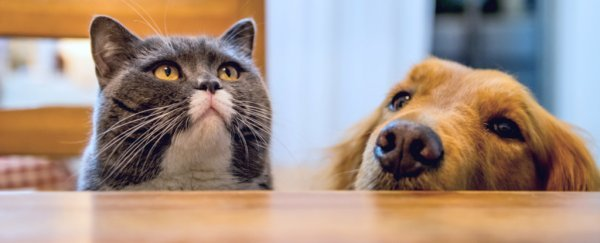

## Import useful packages

In [88]:
from os.path import join
import os

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,ZeroPadding2D,BatchNormalization
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from keras.optimizers import RMSprop

## Data preprocessing

- Create the directory of training and testing data

In [90]:
train_dir = '/Users/apple/Desktop/Tools/Projects/deep learning(imagedata)/train'
test_dir = '/Users/apple/Desktop/Tools/Projects/deep learning(imagedata)/test'

- Extract the path of each image data in both training and testing sets, and store them into two lists

In [91]:
train_path = [join(train_dir,filename) for filename in os.listdir(train_dir)]
test_path = [join(test_dir,filename) for filename in os.listdir(test_dir)]

- For future convinience of labeling, I distinguish image paths of dog and cat from each other in the training set

In [92]:
train_cat = [join(train_dir,filename) for filename in os.listdir(train_dir) if 'cat' in filename]
train_dog = [join(train_dir,filename) for filename in os.listdir(train_dir) if 'dog' in filename]

- The function is used to preprocess image data

In [93]:
image_size = 64 # set the image size of 64*64, so CNN would be able to run 
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    """
    Covert image data into an array:
    each pixel would be replaced by a number based on the level of its shade.
    Reshape the image array and standardize it.
    """
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = img_array.reshape(img_array.shape[0],image_size,image_size,3)/255
    return(output)

In [94]:
train = read_and_prep_images(train_path)

In [95]:
train.max() # the array is already standardized, all the values are between 0 and 1

1.0

## Generate labels
- Set the target variable with dog(1) and cat(0)

In [96]:
labels = []
for i in train_path:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

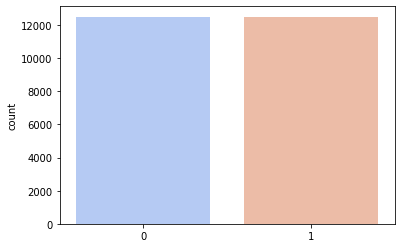

In [97]:
sns.countplot(labels,palette = 'coolwarm')

- The dataset is quite balanced, so it is ok to choose Accuracy as a metric.

In [98]:
train.shape

(25000, 64, 64, 3)

In [99]:
x = train
y = labels

## Exploratory data analysis

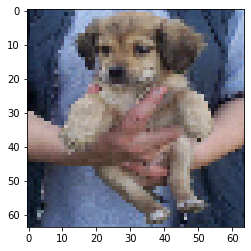

In [18]:
# plot the first image in the dataset
plt.imshow(train[0])

In [19]:
# check image shape
train[0].shape

(64, 64, 3)

## Model

- The model design is followed by VGG16 model. So I build the architecture using convolution and pooling layers.
- The hyper-parameters I tuned includes the number of filters, filter size, padding and stride.
- The principle is to always start by using smaller filters is to collect as much local information as possible, and then gradually increase the filter width to reduce the generated feature space width to represent more global, high-level and representative information.

### Define the models

In [80]:
input_shape = (64,64,3)
cnn1 = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [81]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(400, activation='relu'),
    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [178]:
cnn3 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(64, kernel_size=(3,3), padding="same", activation='relu'),
    Conv2D(64, kernel_size=(3,3), padding="same", activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3,3), padding="same", activation='relu'),
    Conv2D(128, kernel_size=(3,3), padding="same", activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [179]:
cnn3.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 64)      

### Compile the model

- Based on the form of my label, I choose binary_crossentropy as the loss function because the label is binary.
- As I mentioned above, the dataset is quite balanced, so I choose accuracy as the metrics.

In [104]:
def Compile_model(model):
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer='RMSprop',
                 metrics=['accuracy'])
    return model

### Train the model

In [180]:
#model1 = Compile_model(cnn1)
#model2 = Compile_model(cnn2)
model3 = Compile_model(cnn3)

In [ ]:
model1.fit(x, y,
          batch_size=100,
          epochs=3,
          validation_split = 0.2)

In [ ]:
model2.fit(x, y,
          batch_size=100,
          epochs=10,
          validation_split = 0.2)

In [181]:
model3.fit(x, y,
          batch_size=100,
          epochs=10,
          validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 191s 10ms/sample - loss: 0.6922 - acc: 0.5372 - val_loss: 0.6797 - val_acc: 0.5454
Epoch 2/10
20000/20000 [==============================] - 143s 7ms/sample - loss: 0.6694 - acc: 0.6048 - val_loss: 0.6325 - val_acc: 0.6490
Epoch 3/10
20000/20000 [==============================] - 124s 6ms/sample - loss: 0.6231 - acc: 0.6621 - val_loss: 0.6286 - val_acc: 0.6644
Epoch 4/10
20000/20000 [==============================] - 116s 6ms/sample - loss: 0.5501 - acc: 0.7229 - val_loss: 0.5421 - val_acc: 0.7304
Epoch 5/10
20000/20000 [==============================] - 125s 6ms/sample - loss: 0.5013 - acc: 0.7619 - val_loss: 0.4654 - val_acc: 0.7890
Epoch 6/10
20000/20000 [==============================] - 121s 6ms/sample - loss: 0.4534 - acc: 0.7896 - val_loss: 0.4397 - val_acc: 0.7964
Epoch 7/10
20000/20000 [==============================] - 112s 6ms/sample - loss: 0.4078 - acc: 0.8159 - val_l

### Save the weights and the model

In [182]:
model3.save_weights('model3_weights.h5')
model3.save('model3.h5')

### Predict on the test set

- Prepare the image data in the test set

In [108]:
test = read_and_prep_images(test_path)

- Set probability of being a dog image as the predictions 

In [183]:
y_test =  model3.predict_proba(test)

In [184]:
y_test[0]

array([0.38845703], dtype=float32)

In [185]:
test_id = range(1,len(test)+1)

- Create a data frame of predictions

In [186]:
output = pd.DataFrame({'id':test_id,'label':list(y_test)})
output['label'] = output['label'].str.get(0)
output.head()

,id,label
0,1,0.388457
1,2,0.855053
2,3,0.954057
3,4,0.999971
4,5,0.186273


In [187]:
label = output['label'].astype(float)

In [188]:
output = pd.DataFrame({'id':test_id,'label':label})

In [189]:
output.sort_values(by='label',ascending=False).head()

,id,label
4811,4812,1.0
3173,3174,1.0
10069,10070,1.0
12383,12384,1.0
1547,1548,1.0


In [190]:
output = output.set_index('id',drop='True')

In [191]:
output.head()

,label
id,
1,0.388457
2,0.855053
3,0.954057
4,0.999971
5,0.186273


In [192]:
output.to_csv('outputcatdog.csv')